In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/merged_trader_sentiment.csv")
df["date"] = pd.to_datetime(df["date"])

df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification


In [4]:
df.shape
df.columns


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp_x', 'date', 'timestamp_y', 'value', 'classification'],
      dtype='object')

In [5]:
df["classification"].value_counts()


Series([], Name: count, dtype: int64)

In [6]:
trades_per_day = (
    df.groupby(["date", "classification"])
      .size()
      .reset_index(name="num_trades")
)

trades_per_day.groupby("classification")["num_trades"].mean()


Series([], Name: num_trades, dtype: float64)

In [7]:
df.groupby("classification")["size_usd"].describe()


,count,unique,top,freq


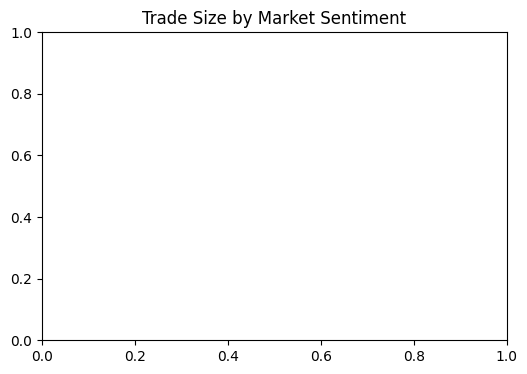

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="classification", y="size_usd")
plt.title("Trade Size by Market Sentiment")
plt.show()


In [10]:
print(df.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp_x', 'date', 'timestamp_y', 'value', 'classification']


In [12]:
df.groupby("classification")["size_usd"].describe()


,count,unique,top,freq


In [13]:
threshold = df["size_usd"].quantile(0.95)

df[df["size_usd"] >= threshold] \
  .groupby("classification")["size_usd"] \
  .count()


Series([], Name: size_usd, dtype: int64)

In [14]:
df.groupby(["classification", "account"]).size() \
  .groupby("classification") \
  .describe()


,count,mean,std,min,25%,50%,75%,max
